# Algoritmos de clasificación 
Alan Ricardo Vilchis Arceo - A01640260

### Regresión logística
La regresión logística, asi como los otros algoritmos que se discuten en este documento, es una técnica de análisis de datos que tiene como objetivo clasificar una variable dependiente usando sus variables independientes dependiendo de la base de datos.
Para esta actividad se clasificara la especie de Iris sabiendo el tamano de su sepalo y petalo utilizando la base de datos Iris.csv que se encuentra en canvas, las especies de Iris son Versicolor, Viginica y Setosa.

#### Función de regresión logística
La regresión logística es un modelo estadístico que utiliza la inversa de la función logit llamada funcion sigmoide 
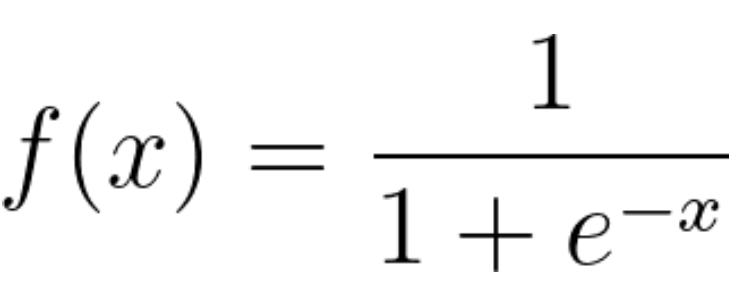


Donde x es la combinacion lineal de los parametros, esta ecuacion representa una curva en forma de S que solo tiene valores entre 0 y 1 para la variable dependiente, si bien este problema requiere de clasificar entre 3 grupos, existen metodos para encontrar mas de dos clases como es la regresion softmax que la misma libreria implementa automaticamente cuando se trata de mas variables

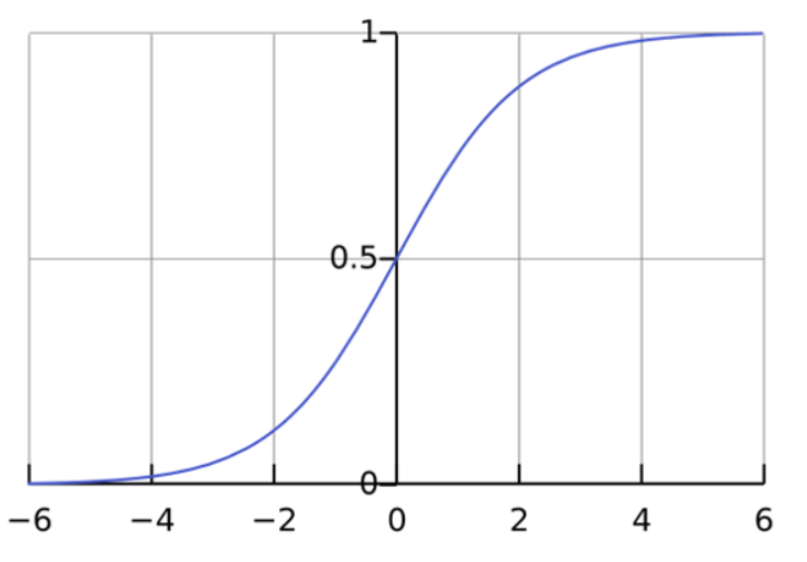

Imagenes recuperadas de Amazon Web Services. (n.f.). What Is Logistic Regression? AWS. https://aws.amazon.com/es/what-is/logistic-regression/


### Implementacion del algoritmo de regresión logística

In [10]:
#Importar librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Limpiar base de datos
df= pd.read_csv('/home/alanv/Documents/7/mate/Iris.csv')
df.drop('Id',axis=1,inplace=True)

#
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Dividir conjunto de prueba y entrenamiento

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,4], test_size=0.2,random_state=42)


# Buscar correlacion
correlacion = x_train.corr()
alta_corr = np.where((correlacion > 0.95) & (correlacion < 1))
baja_corr = np.where((correlacion > -0.95) & (correlacion < -1))
print(alta_corr, baja_corr)
y_train

(array([2, 3]), array([3, 2])) (array([], dtype=int64), array([], dtype=int64))


22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object

### Matriz de confución (regresión logística)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

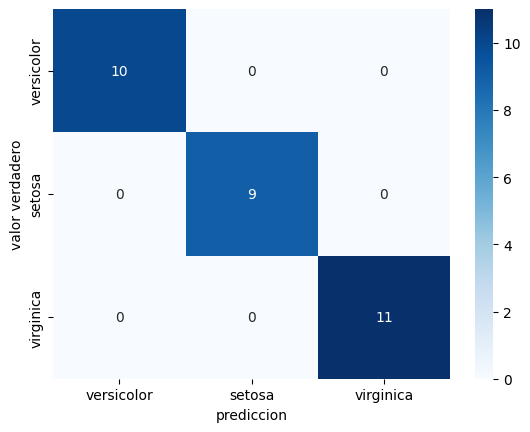

In [12]:
#Estandarizar datos
stdrScaler_x=StandardScaler()
x_train= stdrScaler_x.fit_transform(x_train)
x_test= stdrScaler_x.transform(x_test)
#Implementar Regresion logistica
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_predict=logistic.predict(x_test)
#Graficar matriz de confusion
confusion=confusion_matrix(y_test,y_predict)
sns.heatmap(confusion, annot=True, cmap='Blues')
class_names=['versicolor','setosa','virginica']
trick_marks=[0.5,1.5,2.5]
plt.xticks(trick_marks,class_names)
plt.yticks(trick_marks,class_names)
plt.ylabel('valor verdadero')
plt.xlabel('prediccion')
y_predict


### Exactitud del modelo (regresión logística)

In [13]:
#Exactitud del modelo
print('Exactitud del modelo ',logistic.score(x_test,y_test))


Exactitud del modelo  1.0


### Metodo de bayes
Es una técnica basada en el teorema de Bayes, el algoritmo que se implemeto fue de tipo Naive, esto quiere decir que las variables independientes se asumen que no tienen relacion, esto se reviso con la alta correlacionalidad sonde si hubo, sin embargo los datos fueron estandarizados.
La formula que se aplica es la siguiente, dadas las probabilidades de eventos anteriores

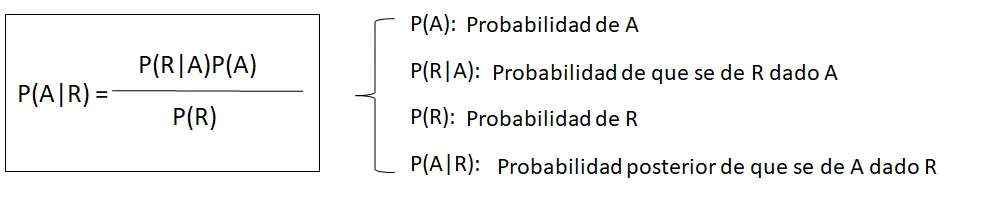

Imagen recuperada de Roman, V. (2019, 08). Algoritmos Naive Bayes: Fundamentos e Implementación. Datos y Ciencia. https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

### Implementación algoritmo de clasificación de bayes

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
      dtype='<U15')

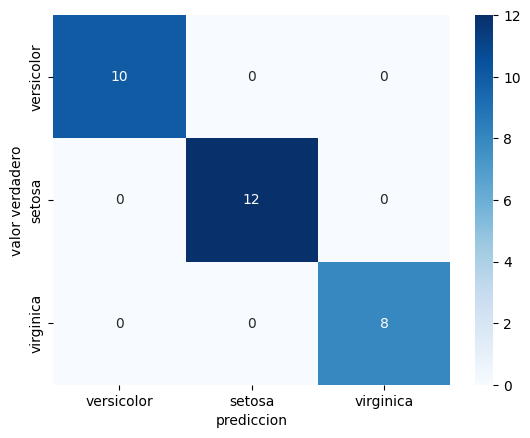

In [14]:
#Algoritmo de clasificación de bayes
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,4], test_size=0.20,random_state=70)
#Estandarizar datos
stdrScaler_x=StandardScaler()
x_train= stdrScaler_x.fit_transform(x_train)
x_test= stdrScaler_x.transform(x_test)
#Aplicar algoritmo
nb = GaussianNB()
nb.fit(x_train,y_train)   
y_predict = nb.predict(x_test)
#Graficar matriz de confusion
confusion=confusion_matrix(y_test,y_predict)
sns.heatmap(confusion, annot=True, cmap='Blues')
class_names=['versicolor','setosa','virginica']
trick_marks=[0.5,1.5,2.5]
plt.xticks(trick_marks,class_names)
plt.yticks(trick_marks,class_names)
plt.ylabel('valor verdadero')
plt.xlabel('prediccion')
y_predict


### Exactitud (metodo bayes naive)

In [15]:
print('Exactitud del modelo',nb.score(x_test,y_test))

Exactitud del modelo 1.0


### Implementación algoritmo de clasificación analisis de discriminantes
EL proceso para implementar este metodo se simplifica en seis pasos, tener los datos clasificados, calcular las probabilidades previas (proporción esperada de observaciones para cada grupo), esto se puede obtener aplicando el teorema de Bayes obteniendo la siguiente ecuación

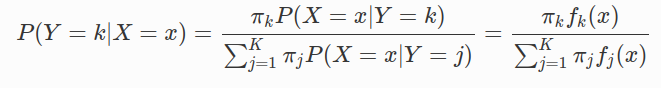

Posterior a eso se deben determinar las covarianzas, para definir si al modelo se le aplica analisis de discriminantes lineal o cuadratico, Despues se deben de estimar los parametros para las funciones de probabilidad condicional. Se define fk(X)≡P(X=x|Y=k) como la función de densidad de probabilidad condicional de X para una observación que pertenece a la clase k. 

Finalmemnte se determina el grupo al que pertenecen los datos calculado el resultado de la funciión discriminante, para obtener una exactitud del modelo se realiza la validación cruzada


array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype='<U15')

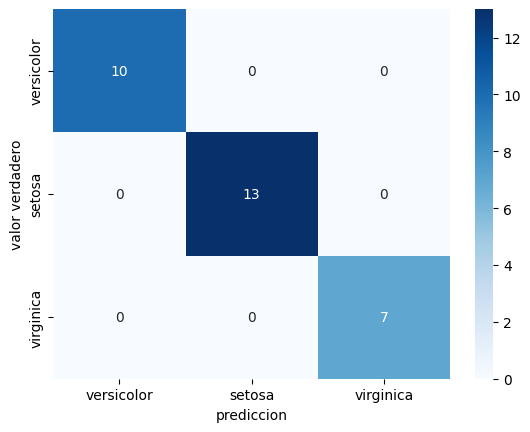

In [16]:
#Algoritmo de analisis de discriminantes
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,4], test_size=0.20,random_state=10)
#Estandarizar datos
stdrScaler_x=StandardScaler()
x_train= stdrScaler_x.fit_transform(x_train)
x_test= stdrScaler_x.transform(x_test)
#Aplicar modelo
adl_model = LinearDiscriminantAnalysis()
adl_model.fit(x_train,y_train) 
y_predict= adl_model.predict(x_test)
#Graficar matriz de confusion
confusion=confusion_matrix(y_test,y_predict)
sns.heatmap(confusion, annot=True, cmap='Blues')
class_names=['versicolor','setosa','virginica']
trick_marks=[0.5,1.5,2.5]
plt.xticks(trick_marks,class_names)
plt.yticks(trick_marks,class_names)
plt.ylabel('valor verdadero')
plt.xlabel('prediccion')
y_predict

In [18]:
exactitud=accuracy_score(y_test,y_predict)
print('Exactitud del modelo',exactitud)

Exactitud del modelo 1.0


### Conclusión 

Viendo los resultados de las exactitudes se podría asumir que cualquier método de los tres probados sería bueno debido a que todos tienen la misma exactitud (100%), sin embargo viendo la teoria y puntos de ventaja y desventaja para cada algoritmo elegiría el de análisis de discriminantes (LDA), ya que tiene ventaja sobre los otros métodos, tiene una ventaja sobre la regresión logística ya que este está pensado para clasificar entre dos grupos, yo estoy buscando tres, por otra parte LDA para conjuntos de datos pequeños calcula predicciones más estables.
En comparación al método de Bayes, LDA no asume que los datos no deben de estar relacionados, y para los datos de Iris si existen datos con una alta correlación, por lo tanto llegué a la conclusión que el mejor algoritmo a utilizar es el de análisis de discriminantes.

### Referencias 

Amazon Web Services. (n.f.). What Is Logistic Regression? AWS. https://aws.amazon.com/es/what-is/logistic-regression/

Roman, V. (2019, 08). Algoritmos Naive Bayes: Fundamentos e Implementación. Datos y Ciencia. https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

Rodrigo, J. (2016, 09). Análisis discriminante lineal (LDA) y análisis discriminante cuadrático (QDA) https://cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda
